# AIM5004_HW1

* Implementation of MLP (Multilayer Perceptron). You are going to write codes in any programming languages from the scratch. You can use some libraries, e.g. numpy, but you are NOT allowed to use any deep learning libraries, such as. Tensorflow, Pytorch, and JAX.

* You should submit the codes as Jupyter notebook, .ipynb file or google colab link. All codes should be executable.

(a) Download MNIST dataset from http://yann.lecun.com/exdb/mnist/ and report the
statistics of the dataset, e.g. how many training (and testing) images, the size of each image, the number of class and the number of images per each classes. Normalize data to [0, 1] if necessary. Show random 3 images per each class.

In [19]:
import os
import gzip
import random
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

We got 4 data files
- train-images-idx3-ubyte.gz
- train-labels-idx1-ubyte.gz
- t10k-images-idx3-ubyte.gz
- t10k-labels-idx1-ubyte.gz

### Handling Training dataset and labels

In [3]:
## Open gz train data downloaded from lecun. - using gzip.open 
with gzip.open('./data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_data_ori = idx2numpy.convert_from_file(f)

with gzip.open('./data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_label_ori = idx2numpy.convert_from_file(f)

In [4]:
## Resizing training dataset and normalize data
train_data_ori = train_data_ori.reshape(len(train_data_ori),-1)
train_data_ori = MinMaxScaler().fit_transform(train_data_ori)

In [5]:
## Encoding training label values
train_label = np.eye(10)[train_label].reshape(len(train_label),10)

## Seperate out the validation set. 
train_data, val_data, train_label, val_label = train_test_split(train_data, train_label, test_size=10000, random_state=710674)

### Handling Test dataset and labels

In [6]:
## Open gz test dataset
with gzip.open('./data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_data = idx2numpy.convert_from_file(f)
    
with gzip.open('./data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_label = idx2numpy.convert_from_file(f)

In [7]:
## Reshaping test dataset and normalize the data
test_data = test_data.reshape(len(test_data),-1)
test_data = MinMaxScaler().fit_transform(test_data)

## Encoding test label values
test_label = np.eye(10)[test_label].reshape(len(test_label),10)

In [15]:
test_label

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
## Reshaping data into pixel formats: (28 x 28) format
train_data = train_data.reshape(len(train_data),28,28)
val_data = val_data.reshape(len(val_data),28,28)
test_data = test_data.reshape(len(test_data),28,28)

### Dataset Statistics

In [10]:
print("The train data has ", str(train_data.shape[0]), "samples")
print("The validation data has ", str(val_data.shape[0]), "samples")
print("The test data has ", str(test_data.shape[0]), "samples")

The train data has  50000 samples
The validation data has  10000 samples
The test data has  10000 samples


### Random image samples

In [24]:
rand_list = []
for i in range(0, 3):
    n = random.randint(1, len(train_data))
    rand_list.append(n)

In [25]:
rand_list

[21328, 2230, 23143]

In [ ]:
plt.imshow(train_data.loc[r])

In [45]:
def SampleImages():
    ran = random.sample(range(len(train_data)),3)
    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.imshow(train_data[ran[0]], cmap='gray');plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(train_data[ran[1]], cmap='gray');plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(train_data[ran[2]], cmap='gray');plt.axis('off')

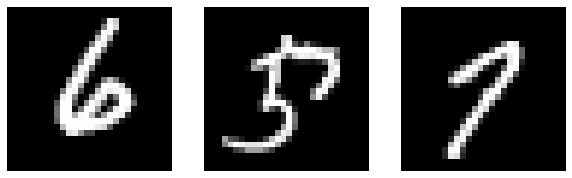

In [46]:
SampleImages()

(b) Implement a MLP architecture and write forward pass. You need to implement all
following layers, ReLU activation function, and softmax function. You should also
implement cross-entropy loss function.

(1) Architecture:\
[Layer 1] → Flatten layer that will flatten image 2D matrix into 1D vector.\
[Layer 2] → Dense layer (fully connected layer) with 128 hidden units, followed
by ReLU activation function.\
[Layer 3] → Dense layer (fully connected layer) with 128 hidden units, followed
by ReLU activation function.\
[Layer 4] → Output dense layer (fully connected layer) with 10 softmax outputs.

(c) Implement backward pass to compute the gradients w.r.t the parameters. You should check the correctness of your implementation by either (1) using finite difference or (2) using the existing deep learning libraries. Please provide checking codes in the report .

(d) Implement a stochastic gradient descent (SGD) algorithm and train your model. Please provide training and validation loss curves in a single plot.

(e) Train with different hyperparameters. Try at least 5 different learning rates and minibatch sizes. Plot training and validation curves for all different configurations in a single plot.